In [17]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer, EsmForMaskedLM
from tokenizers import Tokenizer
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

In [18]:
from scipy.spatial.distance import jensenshannon

Here we run ProGen2 forward and backward taking the average of the logits and attempt to determine the symmetry of its output.


In [19]:
from plm_compare_progen2 import *
from protein_data import *

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

model_name = "hugohrban/progen2-medium"
model, tokenizer = initialize_progen2(model_name)

Using cpu device


# New 1

In [21]:
with open('/Users/johnhutchens/Desktop/Practicum/Data/ISDH_STAWW/pg2_ISDH_STAAW_matrices.pickle',
           'rb') as f:
    pg_dict = pickle.load(f)

In [22]:
# pg_dict[None]
keys = list(pg_dict.keys())
print(None in keys)

True


In [23]:
pg_dict[None].keys()

dict_keys(['mutated_sequence', 'log_probs', 'ref_log_probs', 'llr_matrix'])

In [24]:
unif_dist = np.ones(20)/20
non_uniform = []

k = None
log_probs = pg_dict[k]['log_probs']

for i in range(len(log_probs)):
    prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)
    if jensenshannon(prob_dist, unif_dist) > 0.5:
        non_uniform.append(i)

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2241/3875354411.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)


In [25]:
print(non_uniform)

[]


In [26]:
All_non_uniform=[]
unif_dist = np.ones(20)/20
for k in keys:
    unif_dist = np.ones(20)/20
    non_uniform = []

    print(k)
    log_probs = pg_dict[k]['log_probs']

    for i in range(len(log_probs)):
        prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)
        if jensenshannon(prob_dist, unif_dist) > 0.5:
            non_uniform.append(i)
            All_non_uniform.append(i)
    print(non_uniform)
    print('=====================================================================')


A13C
[]
A13E
[]
A13G
[]
A13I
[]
A13L
[]
A13N
[]
A13Q
[]
A13S
[]
A13T
[]
A13V
[]
A13W
[]
A36C
[]
A36D
[]
A36E
[]
A36F
[]
A36G
[]
A36H
[]
A36I
[]
A36K
[]
A36L
[]
A36M
[]
A36N
[]
A36P
[]
A36Q
[]
A36R
[]
A36S
[]
A36T
[]
A36V
[]
A36W
[]
A36Y
[]
A50C
[]
A50D
[]
A50E
[]
A50F
[]
A50G
[]
A50H
[]
A50I
[]
A50K
[]
A50L
[]
A50M
[]
A50N
[]
A50P
[]
A50Q
[]
A50R
[]
A50S
[]
A50T
[]
A50V
[]
A50W
[]
A50Y
[]
A8C
[]
A8D
[]
A8E
[]
A8F
[]
A8G
[]
A8H
[]
A8I
[]
A8K
[]
A8L
[]
A8M
[]
A8N
[]
A8P
[]
A8Q
[]
A8R
[]
A8S
[]
A8T
[]
A8V
[]
A8W
[]
A8Y
[]
D43A
[]
D43C
[]
D43E
[]
D43F
[]
D43G
[]
D43H
[]
D43I
[]
D43K
[]
D43L
[]
D43M
[]
D43N
[]
D43Q
[]
D43R
[]
D43S
[]
D43T
[]
D43V
[]
D43W
[]
D43Y
[]
D51A
[]
D51C
[]
D51E
[]
D51F
[]
D51G
[]
D51H
[]
D51I
[]
D51K
[]
D51L
[]
D51M
[]
D51N
[]
D51P
[]
D51Q
[]
D51R
[]
D51S
[]
D51T
[]
D51V
[]
D51W
[]
D51Y
[]
E17A
[]
E17C
[]
E17D
[]
E17F
[]
E17G
[]
E17H
[]
E17I
[]
E17K
[]
E17L
[]
E17M
[]
E17N
[]
E17P
[]
E17Q
[]
E17R
[]
E17S
[]
E17T
[]
E17V
[]
E17W
[]
E17Y
[]
E22A
[]
E22C
[]
E22D
[]
E22

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2241/4189719419.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)


[]
E24P:R46Q
[]
E24P:R46S
[]
E24Q
[]
E24Q:R46A
[]
E24Q:R46C
[]
E24Q:R46D
[]
E24Q:R46E
[]
E24Q:R46F
[]
E24Q:R46G
[]
E24Q:R46H
[]
E24Q:R46I
[]
E24Q:R46K
[]
E24Q:R46L
[]
E24Q:R46M
[]
E24Q:R46N
[]
E24Q:R46Q
[]
E24Q:R46S
[]
E24Q:R46T
[]
E24Q:R46V
[]
E24Q:R46W
[]
E24Q:R46Y
[]
E24R
[]
E24R:R46A
[]
E24R:R46C
[]
E24R:R46E
[]
E24R:R46F
[]
E24R:R46G
[]
E24R:R46H
[]
E24R:R46I
[]
E24R:R46K
[]
E24R:R46L
[]
E24R:R46M
[]
E24R:R46N
[]
E24R:R46Q
[]
E24R:R46S
[]
E24R:R46T
[]
E24R:R46V
[]
E24R:R46W
[]
E24R:R46Y
[]
E24S
[]
E24S:R46A
[]
E24S:R46C
[]
E24S:R46D
[]
E24S:R46E
[]
E24S:R46F
[]
E24S:R46G
[]
E24S:R46H
[]
E24S:R46I
[]
E24S:R46K
[]
E24S:R46L
[]
E24S:R46M
[]
E24S:R46N
[]
E24S:R46Q
[]
E24S:R46S
[]
E24S:R46T
[]
E24S:R46V
[]
E24S:R46W
[]
E24S:R46Y
[]
E24T
[]
E24T:R46A
[]
E24T:R46C
[]
E24T:R46D
[]
E24T:R46E
[]
E24T:R46F
[]
E24T:R46G
[]
E24T:R46H
[]
E24T:R46I
[]
E24T:R46K
[]
E24T:R46L
[]
E24T:R46M
[]
E24T:R46N
[]
E24T:R46Q
[]
E24T:R46S
[]
E24T:R46T
[]
E24T:R46V
[]
E24T:R46W
[]
E24T:R46Y
[]
E24V
[]
E24V:R46

In [27]:
mut_poss = []
for key in keys: 
    if key:  
        mut = key
        # print(mut)
        seq = pg_dict[key]['mutated_sequence']

        len_mut = len(mut)
        orig = mut[0]
        pos = int(mut[1:len_mut-1])-1
        new = mut[len_mut-1]
        mut_poss.append(pos)
print(list(set(mut_poss)))

ValueError: invalid literal for int() with base 10: '24A:R46'

In [ ]:
All_non_uniform_un = list(set(All_non_uniform))
print(f"Length:{len(All_non_uniform_un)} with min {min(All_non_uniform_un)} max {max(All_non_uniform_un)}")

mut_poss_un = list(set(mut_poss))
print(f"Length:{len(mut_poss_un)} with min {min(mut_poss_un)} max {max(mut_poss_un)}")


Length:235 with min 37 max 348
Length:322 with min 32 max 353


/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2241/2180191153.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [np.array(eB)[i] for i in range(54)]


IndexError: list index out of range

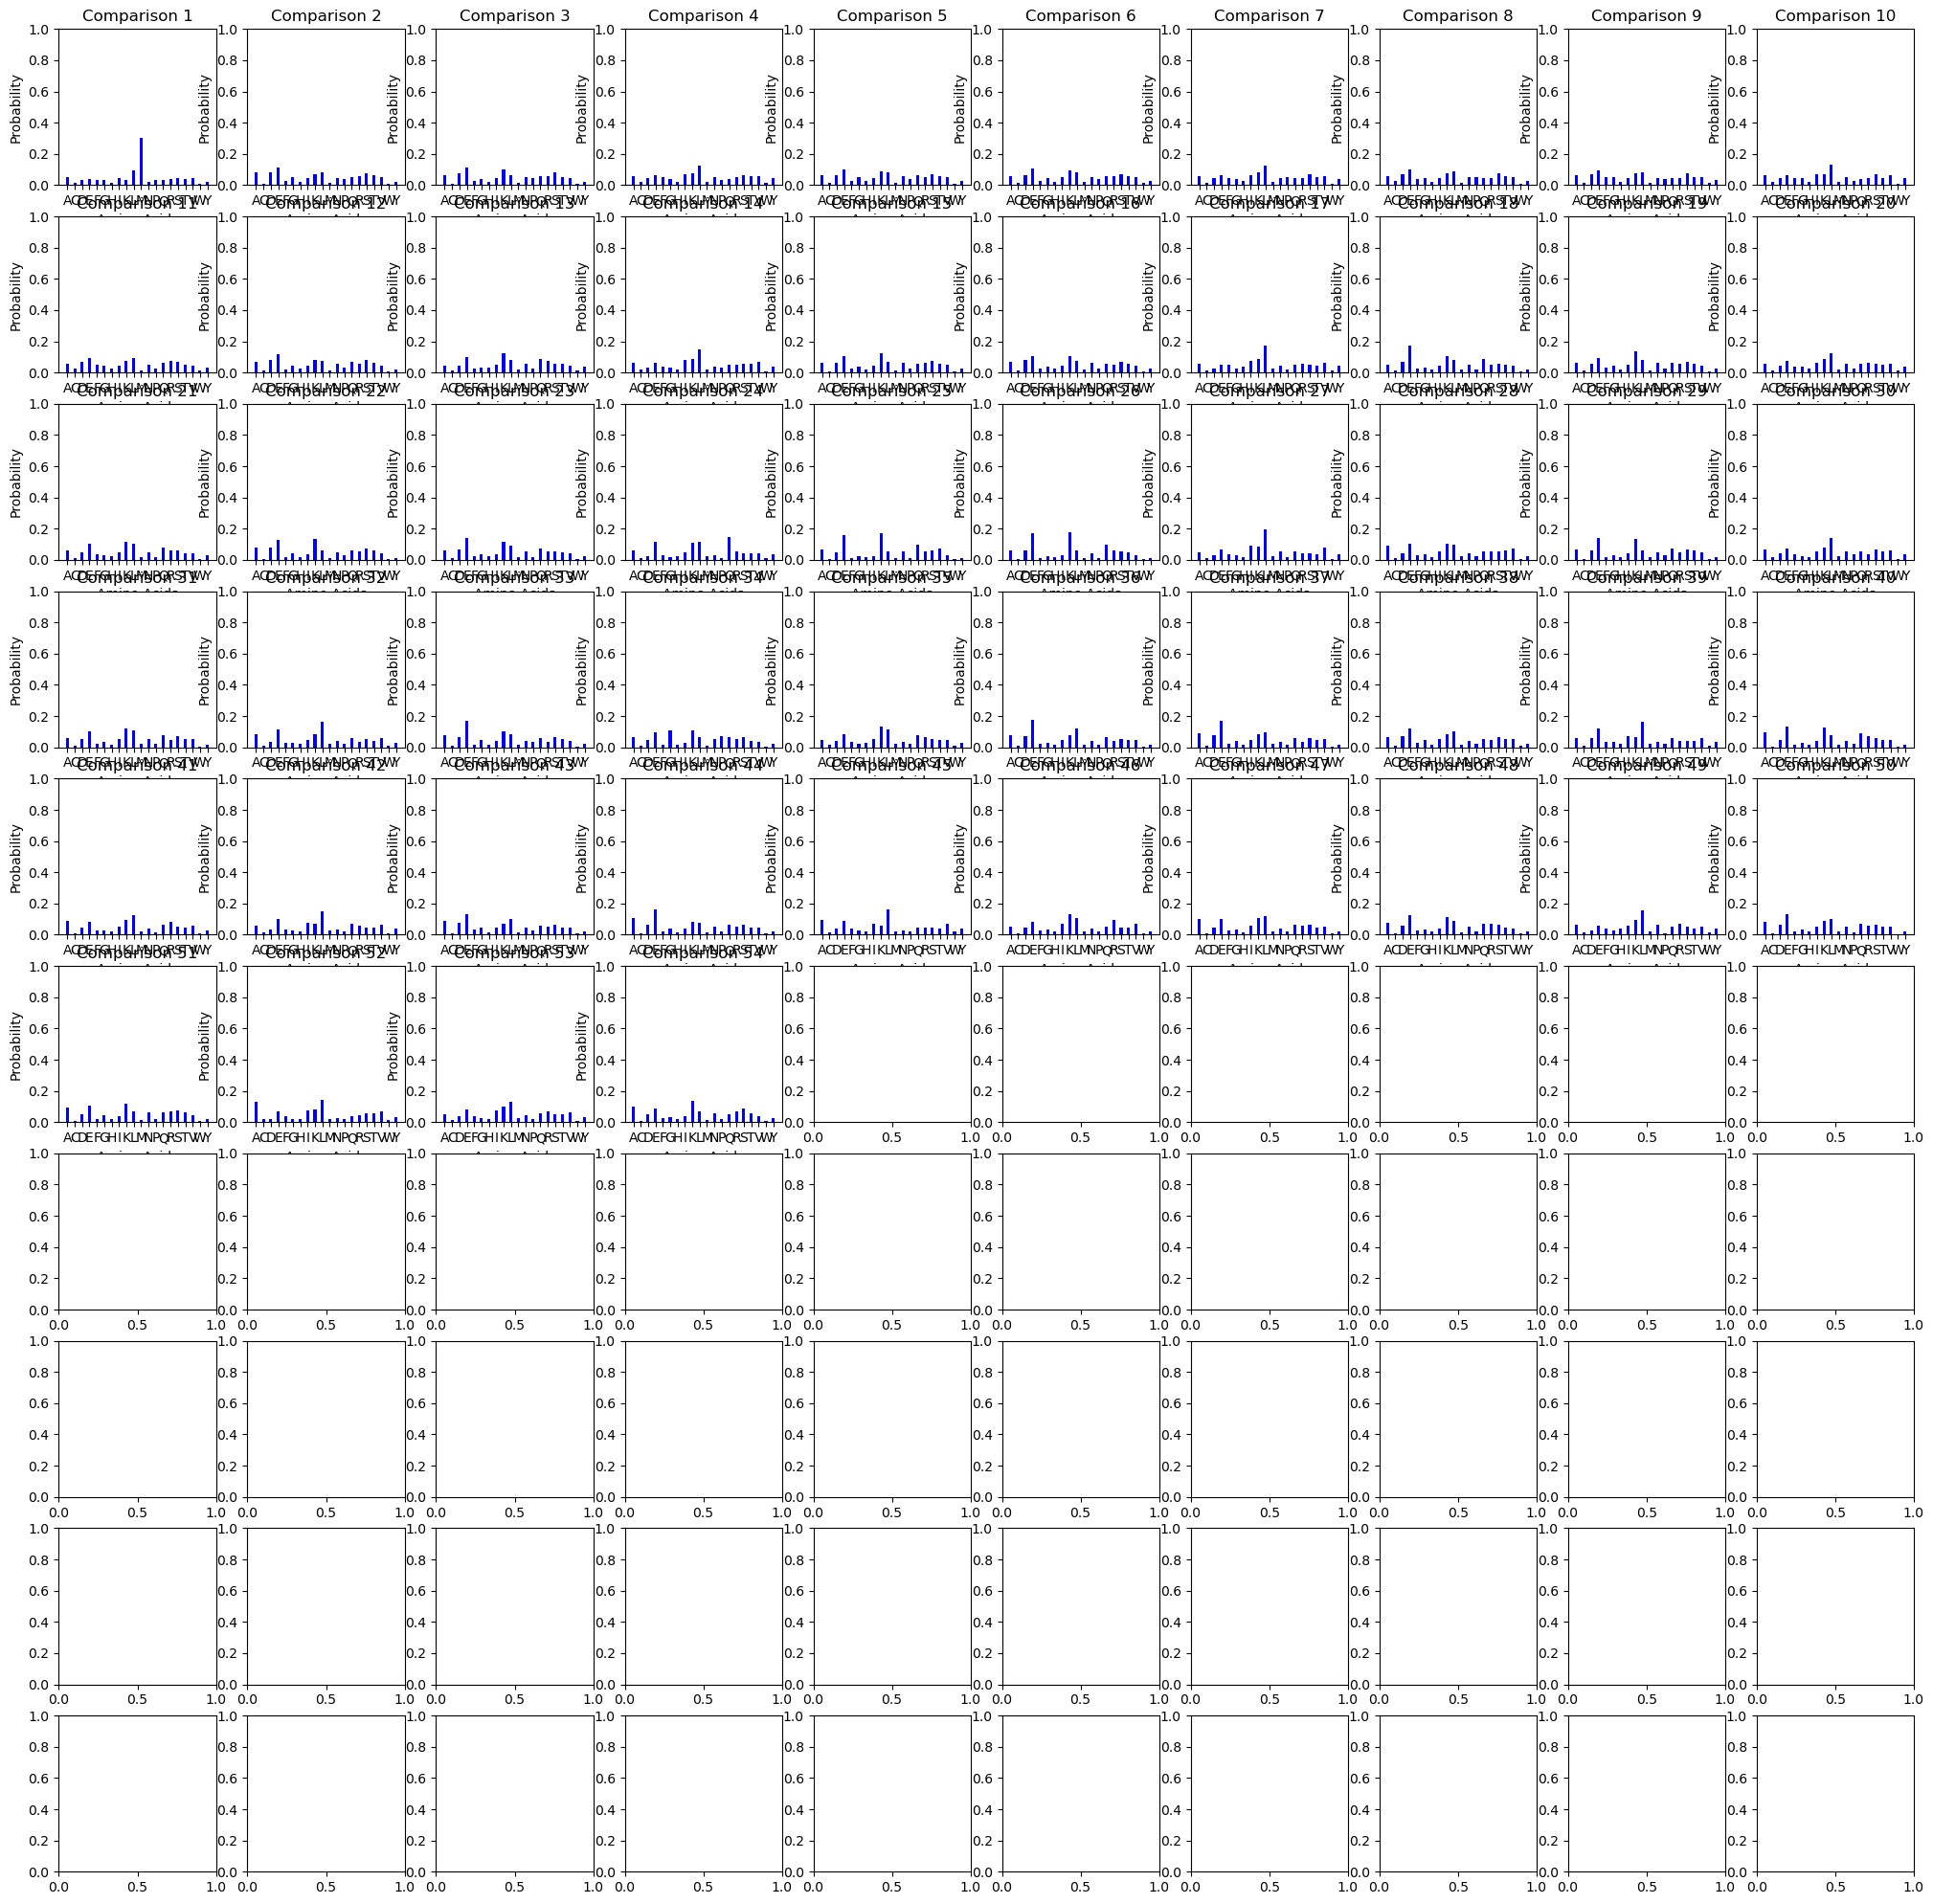

In [ ]:
# A = esm_dict[keys[0]]['log_probs']
B = pg_dict[keys[0]]['log_probs']

# eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [np.array(eB)[i] for i in range(54)]

# Plot settings
fig, axes = plt.subplots(10, 10, figsize=(25, 25))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist2 = pairs10[i]
    # ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x, dist2, width=bar_width, color="blue")
    ax.set_title(f"Comparison {i+1}")
    ax.set_xlabel("Amino Acids")
    ax.set_ylabel("Probability")
    ax.set_ylim(0, 1)
    ax.set_xticks(x)
    ax.set_xticklabels(aa_list)  
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# New 2

In [ ]:
with open('/Users/johnhutchens/Desktop/Practicum/Data/B2L11_HUMAN/pg2_B2L11_HUMAN_matrices.pickle',
           'rb') as f:
    pg_dict = pickle.load(f)

In [ ]:
keys = list(pg_dict.keys())
print(keys)

['A149D', 'A149E', 'A149F', 'A149G', 'A149H', 'A149I', 'A149K', 'A149L', 'A149N', 'A149P', 'A149Q', 'A149R', 'A149S', 'A149T', 'A149V', 'A149W', 'A149Y', 'D157A', 'D157E', 'D157F', 'D157G', 'D157H', 'D157I', 'D157K', 'D157L', 'D157N', 'D157P', 'D157Q', 'D157R', 'D157S', 'D157T', 'D157V', 'D157W', 'D157Y', 'E151A', 'E151D', 'E151F', 'E151G', 'E151H', 'E151I', 'E151K', 'E151L', 'E151N', 'E151P', 'E151Q', 'E151R', 'E151S', 'E151T', 'E151V', 'E151W', 'E151Y', 'E158A', 'E158D', 'E158F', 'E158G', 'E158H', 'E158I', 'E158K', 'E158L', 'E158N', 'E158P', 'E158Q', 'E158R', 'E158S', 'E158T', 'E158V', 'E158W', 'E158Y', 'F159A', 'F159D', 'F159E', 'F159G', 'F159H', 'F159I', 'F159K', 'F159L', 'F159N', 'F159P', 'F159Q', 'F159R', 'F159S', 'F159T', 'F159V', 'F159W', 'F159Y', 'G156A', 'G156D', 'G156E', 'G156F', 'G156H', 'G156I', 'G156K', 'G156L', 'G156N', 'G156P', 'G156Q', 'G156R', 'G156S', 'G156T', 'G156V', 'G156W', 'G156Y', 'I148A', 'I148D', 'I148E', 'I148F', 'I148G', 'I148H', 'I148K', 'I148L', 'I148N', 

In [ ]:
len(pg_dict[keys[0]]['mutated_sequence'])

198

In [ ]:
All_non_uniform=[]
unif_dist = np.ones(20)/20
for k in keys:
    unif_dist = np.ones(20)/20
    non_uniform = []

    print(k)
    log_probs = pg_dict[k]['log_probs']

    for i in range(len(log_probs)):
        prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)
        if jensenshannon(prob_dist, unif_dist) > 0.5:
            non_uniform.append(i)
            All_non_uniform.append(i)
    print(non_uniform)
    print('=====================================================================')


A149D
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 129, 130, 131, 132, 134, 135]
A149E
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 129, 130, 131, 132, 134, 135, 151, 158, 161]
A149F
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 129, 130, 131, 132, 134, 135]
A149G
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 129, 130, 131, 132, 134, 135]
A149H
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 129, 130, 131, 132, 134, 135, 158]
A149I
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1223/4189719419.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)


[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 149, 151, 152, 153, 154, 155]
G156Q
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 149, 151, 152, 153, 155]
G156R
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 129, 130, 131, 132, 134, 135, 149, 151, 152, 155]
G156S
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 149, 151, 152, 153, 155]
G156T
[91, 96, 97, 98, 99, 100, 101, 103, 104, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 149, 151, 152, 153, 155]
G

In [ ]:
mut_poss = []
for key in keys: 
    if key:  
        mut = key
        # print(mut)
        seq = pg_dict[key]['mutated_sequence']

        len_mut = len(mut)
        orig = mut[0]
        pos = int(mut[1:len_mut-1])-1
        new = mut[len_mut-1]
        mut_poss.append(pos)
print(list(set(mut_poss)))

[147, 148, 150, 151, 152, 154, 155, 156, 157, 158]


In [ ]:
All_non_uniform_un = list(set(All_non_uniform))
print(f"Length:{len(All_non_uniform_un)} with min {min(All_non_uniform_un)} max {max(All_non_uniform_un)}")

mut_poss_un = list(set(mut_poss))
print(f"Length:{len(mut_poss_un)} with min {min(mut_poss_un)} max {max(mut_poss_un)}")


Length:52 with min 91 max 191
Length:10 with min 147 max 158


/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2884/2876254124.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [np.array(eB)[i] for i in range(100)]


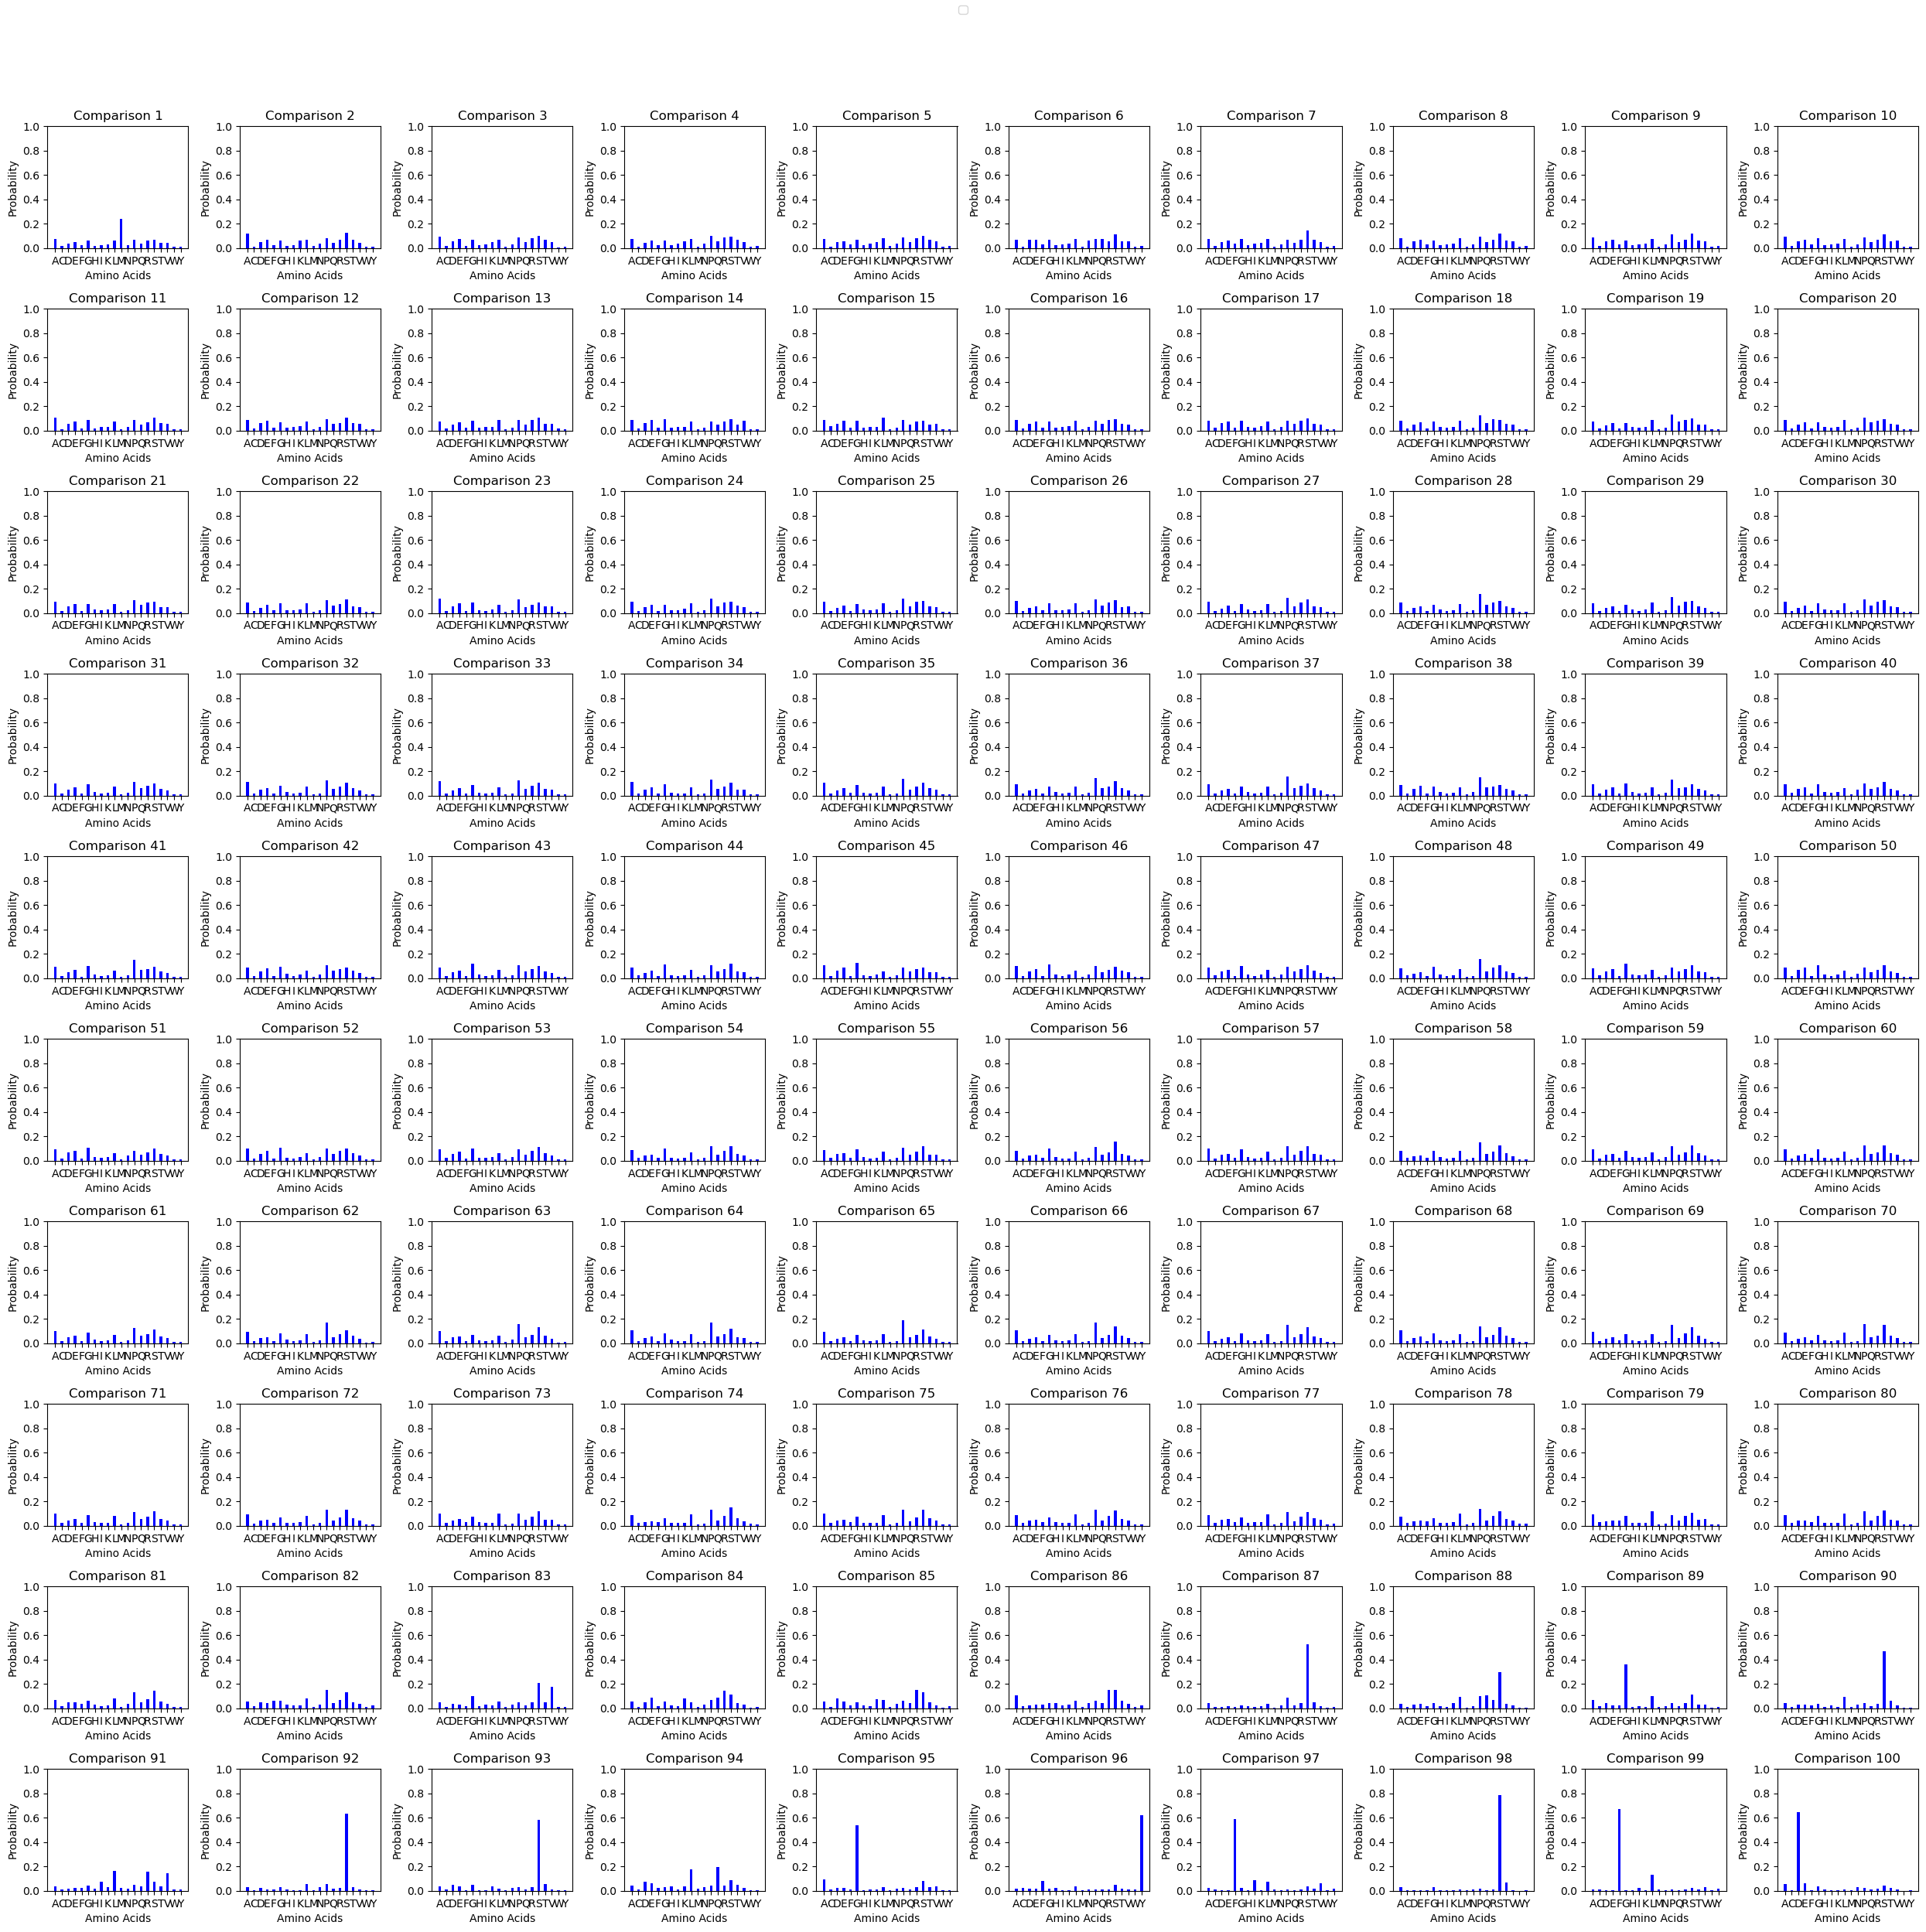

In [ ]:
# A = esm_dict[keys[0]]['log_probs']
B = pg_dict[keys[0]]['log_probs']

# eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [np.array(eB)[i] for i in range(100)]

# Plot settings
fig, axes = plt.subplots(10, 10, figsize=(25, 25))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist2 = pairs10[i]
    # ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x, dist2, width=bar_width, color="blue")
    ax.set_title(f"Comparison {i+1}")
    ax.set_xlabel("Amino Acids")
    ax.set_ylabel("Probability")
    ax.set_ylim(0, 1)
    ax.set_xticks(x)
    ax.set_xticklabels(aa_list)  
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# New 3

In [ ]:
filename = '/Users/johnhutchens/Desktop/Practicum/Data/CALM1_HUMAN/pg2_CALM1_HUMAN_matrices.pickle'
with open(filename,
           'rb') as f:
    pg_dict = pickle.load(f)

In [ ]:
keys = list(pg_dict.keys())
print(keys)

['A2Y', 'A2V', 'A2T', 'A2S', 'A2P', 'A2N', 'A2G', 'A2F', 'A2E', 'A2D', 'A2W', 'D3E', 'D3Y', 'D3A', 'D3R', 'D3V', 'D3T', 'D3S', 'D3Q', 'D3F', 'D3G', 'D3H', 'D3K', 'D3L', 'D3P', 'D3N', 'Q4R', 'Q4P', 'Q4K', 'Q4H', 'Q4L', 'L5R', 'L5M', 'L5K', 'L5N', 'L5I', 'L5P', 'L5H', 'L5Q', 'L5S', 'L5E', 'L5D', 'L5A', 'L5V', 'L5W', 'L5G', 'L5T', 'T6V', 'T6S', 'T6P', 'T6M', 'T6I', 'T6A', 'E7D', 'E7F', 'E7A', 'E7Y', 'E7V', 'E7Q', 'E7R', 'E7K', 'E7H', 'E7G', 'E7L', 'E8A', 'E8D', 'E8V', 'E8S', 'E8R', 'E8K', 'E8G', 'Q9A', 'Q9C', 'Q9D', 'Q9E', 'Q9V', 'Q9W', 'Q9F', 'Q9S', 'Q9P', 'Q9N', 'Q9L', 'Q9K', 'Q9G', 'Q9H', 'Q9Y', 'Q9R', 'Q9T', 'I10L', 'I10E', 'I10D', 'I10A', 'I10K', 'I10F', 'I10V', 'I10G', 'I10R', 'I10M', 'I10N', 'I10P', 'I10S', 'I10T', 'A11Y', 'A11V', 'A11T', 'A11S', 'A11C', 'A11N', 'A11M', 'A11L', 'A11G', 'A11F', 'A11E', 'A11D', 'A11R', 'A11I', 'A11P', 'E12A', 'E12R', 'E12Q', 'E12N', 'E12L', 'E12K', 'E12H', 'E12G', 'E12D', 'E12T', 'E12V', 'F13I', 'F13C', 'F13L', 'F13M', 'F13Q', 'F13R', 'F13S', 'F13V',

In [ ]:
len(pg_dict[keys[0]]['mutated_sequence'])

149

In [ ]:
All_non_uniform=[]
unif_dist = np.ones(20)/20
for k in keys:
    unif_dist = np.ones(20)/20
    non_uniform = []

    print(k)
    log_probs = pg_dict[k]['log_probs']

    for i in range(len(log_probs)):
        prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)
        if jensenshannon(prob_dist, unif_dist) > 0.5:
            non_uniform.append(i)
            All_non_uniform.append(i)
    print(non_uniform)
    print('=====================================================================')


A2Y
[2, 3, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 145, 146, 147, 148]
A2V
[2, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 10

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1223/4189719419.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)


[5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 145, 146, 147, 148]
E12K
[2, 5, 6, 7, 8, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 1

In [ ]:
mut_poss = []
for key in keys: 
    if key:  
        mut = key
        # print(mut)
        seq = pg_dict[key]['mutated_sequence']

        len_mut = len(mut)
        orig = mut[0]
        pos = int(mut[1:len_mut-1])-1
        new = mut[len_mut-1]
        mut_poss.append(pos)
print(list(set(mut_poss)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]


In [ ]:
All_non_uniform_un = list(set(All_non_uniform))
print(f"Length:{len(All_non_uniform_un)} with min {min(All_non_uniform_un)} max {max(All_non_uniform_un)}")

mut_poss_un = list(set(mut_poss))
print(f"Length:{len(mut_poss_un)} with min {min(mut_poss_un)} max {max(mut_poss_un)}")


Length:147 with min 2 max 148
Length:148 with min 1 max 148


/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2884/2876254124.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [np.array(eB)[i] for i in range(100)]


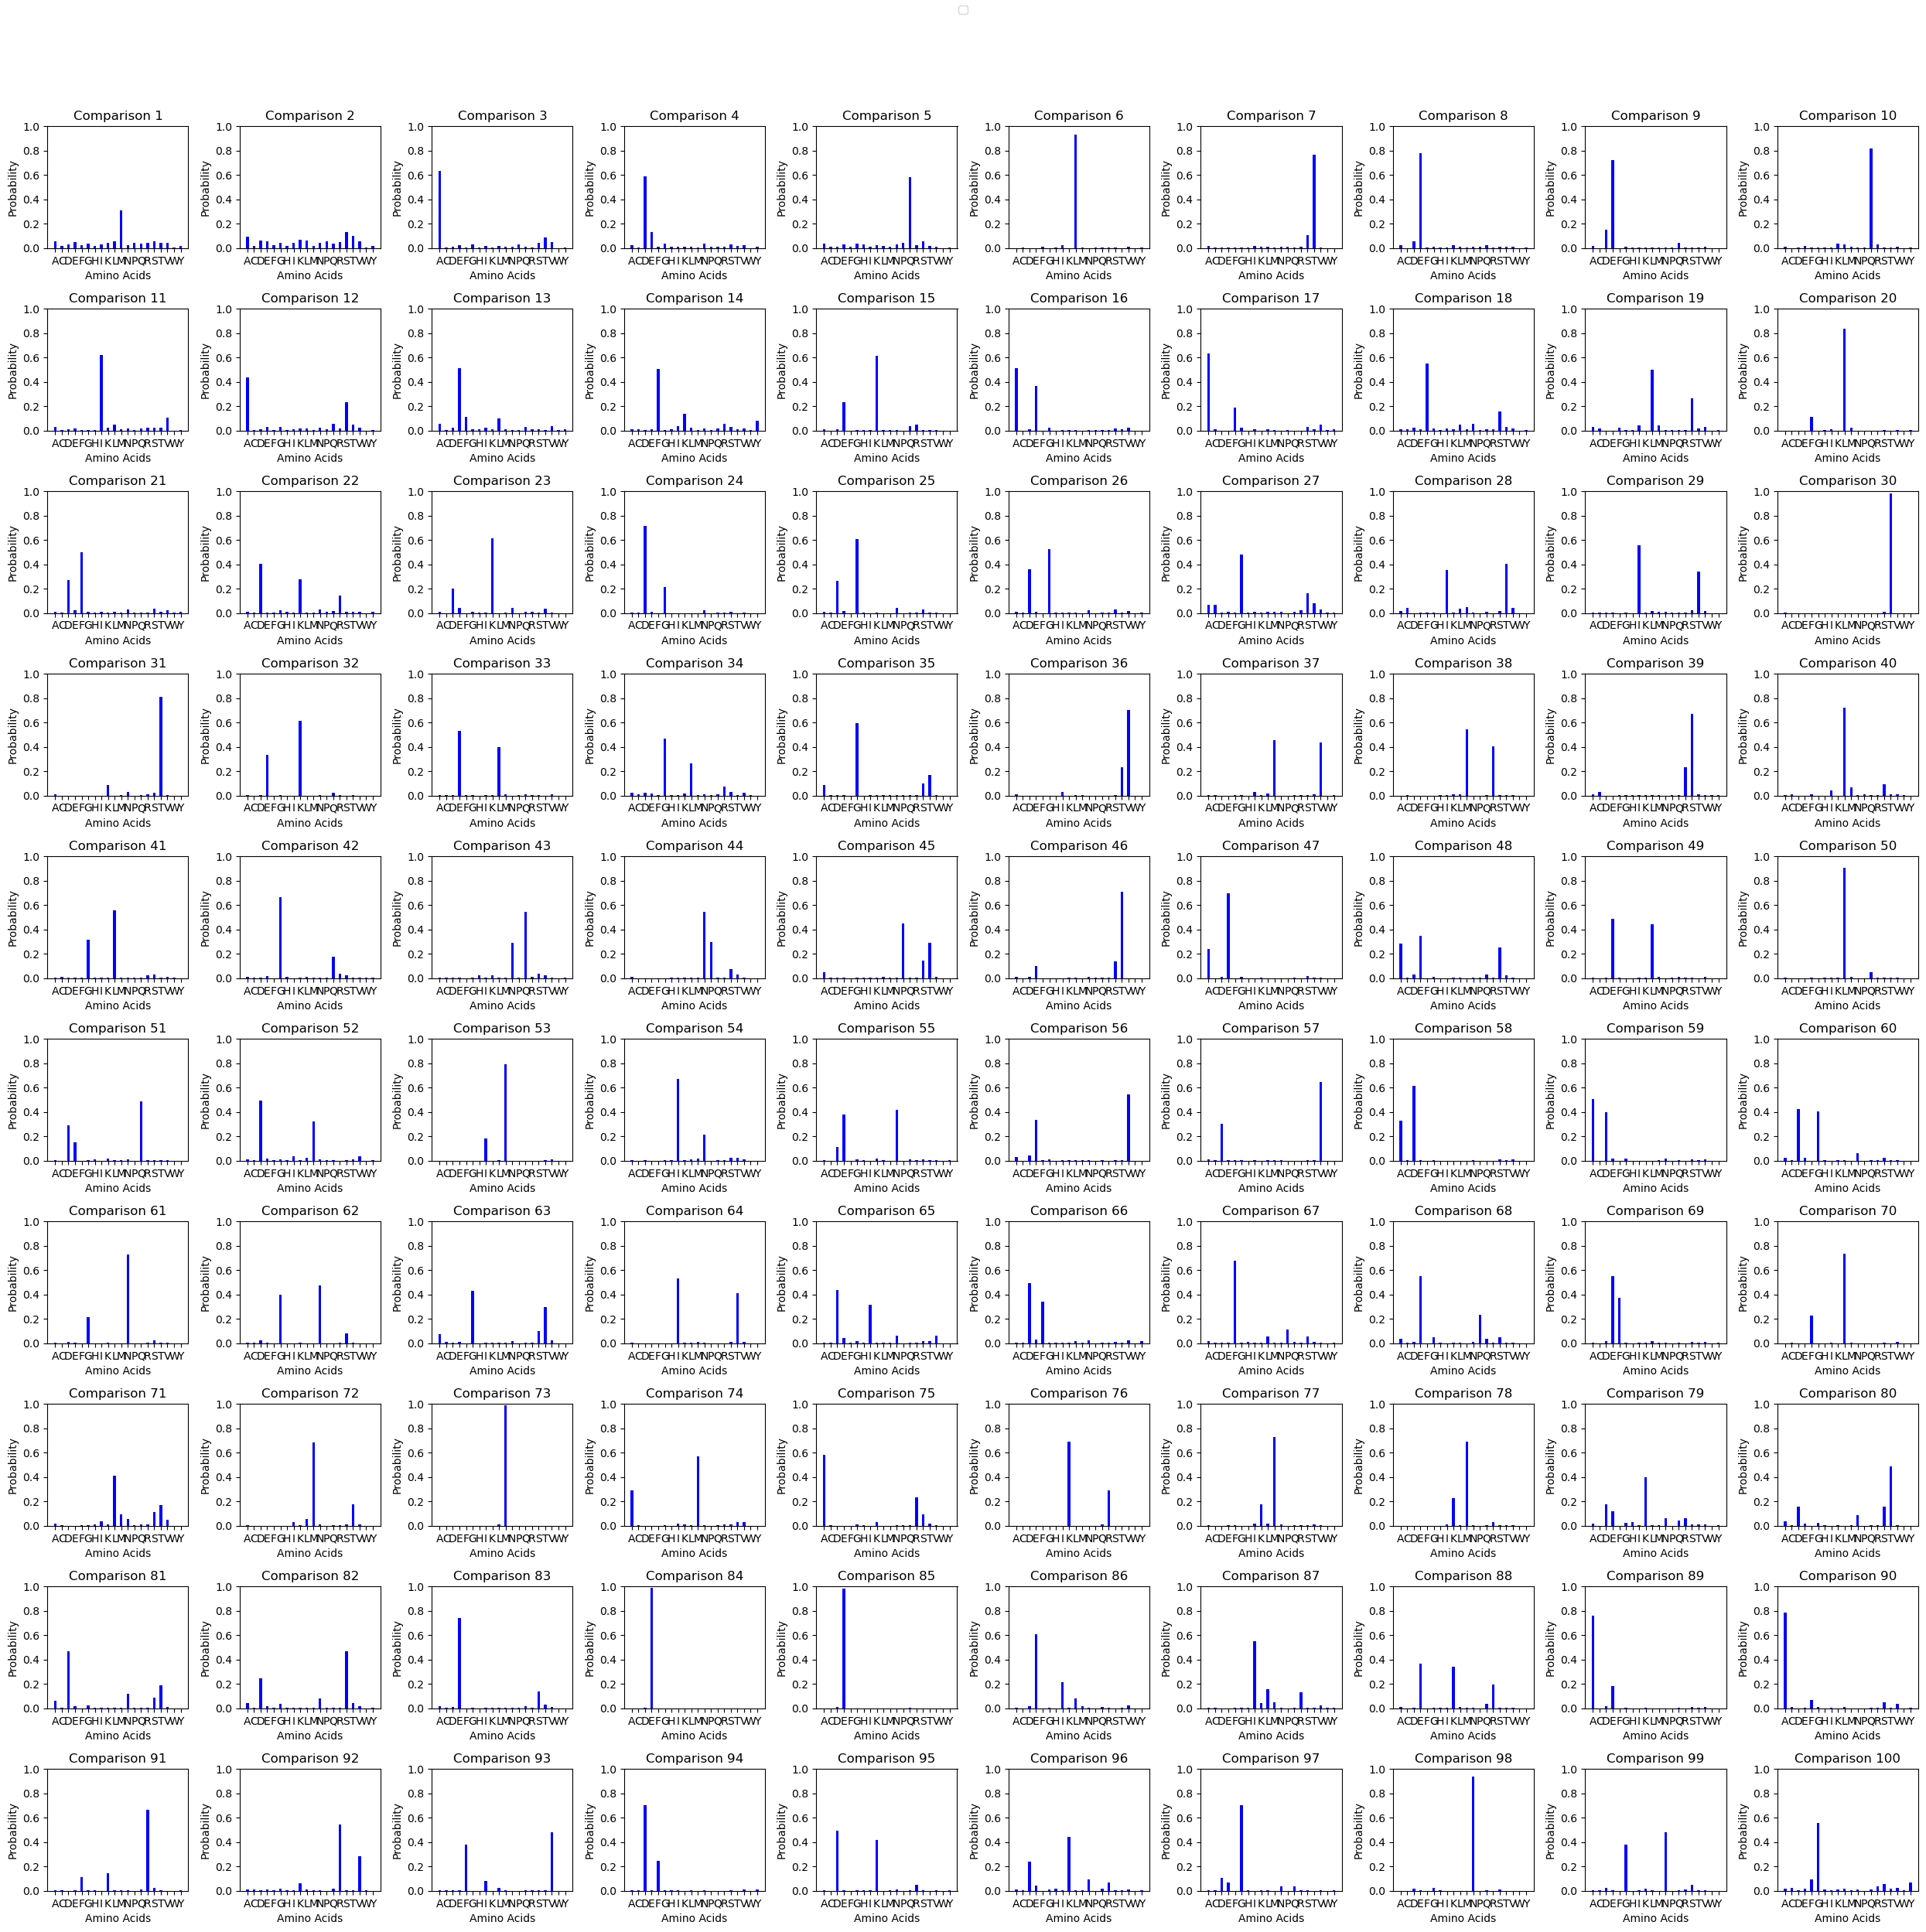

In [ ]:
# A = esm_dict[keys[0]]['log_probs']
B = pg_dict[keys[0]]['log_probs']

# eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [np.array(eB)[i] for i in range(100)]

# Plot settings
fig, axes = plt.subplots(10, 10, figsize=(25, 25))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist2 = pairs10[i]
    # ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x, dist2, width=bar_width, color="blue")
    ax.set_title(f"Comparison {i+1}")
    ax.set_xlabel("Amino Acids")
    ax.set_ylabel("Probability")
    ax.set_ylim(0, 1)
    ax.set_xticks(x)
    ax.set_xticklabels(aa_list)  
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# GDIA_HUMAN

In [ ]:
filename = '/Users/johnhutchens/Desktop/Practicum/Data/GDIA_HUMAN/pg2_GDIA_HUMAN_matrices.pickle'

with open(filename,
           'rb') as f:
    pg_dict = pickle.load(f)

In [ ]:
keys = list(pg_dict.keys())
print(keys)

['A126S', 'A126T', 'A126V', 'A128P', 'A128S', 'A128T', 'A128V', 'A148P', 'A148S', 'A148T', 'A148V', 'A188G', 'A188S', 'A188T', 'A188V', 'A190S', 'A190T', 'A190V', 'A217S', 'A217T', 'A217V', 'A239S', 'A239T', 'A239V', 'A243S', 'A243T', 'A243V', 'A275S', 'A275T', 'A275V', 'A294S', 'A294T', 'A294V', 'A314S', 'A314T', 'A314V', 'A340S', 'A340T', 'A340V', 'A344T', 'A344V', 'A345S', 'A345T', 'A345V', 'A351D', 'A351S', 'A351T', 'A351V', 'A353S', 'A353T', 'A353V', 'A369S', 'A369T', 'A369V', 'A382S', 'A382T', 'A382V', 'A406D', 'A406S', 'A406T', 'A406V', 'A425D', 'A425S', 'A425T', 'A425V', 'A428S', 'A428T', 'A428V', 'A445G', 'A445S', 'A445V', 'A83S', 'A83T', 'A83V', 'C17F', 'C17Y', 'C202F', 'C202R', 'C202Y', 'C277F', 'C277R', 'C277Y', 'C282F', 'C282R', 'C282Y', 'C302F', 'C302G', 'C302R', 'C302Y', 'C317F', 'C317R', 'C317W', 'C317Y', 'C335F', 'C335R', 'C335S', 'C335Y', 'C394F', 'C394R', 'C394Y', 'C400F', 'C400R', 'C400Y', 'C402F', 'C402R', 'C402Y', 'C414F', 'C414R', 'C414S', 'C414Y', 'D101G', 'D101

In [ ]:
len(pg_dict[keys[0]]['mutated_sequence'])

447

In [ ]:
All_non_uniform=[]
unif_dist = np.ones(20)/20
for k in keys:
    unif_dist = np.ones(20)/20
    non_uniform = []

    print(k)
    log_probs = pg_dict[k]['log_probs']

    for i in range(len(log_probs)):
        prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)
        if jensenshannon(prob_dist, unif_dist) > 0.5:
            non_uniform.append(i)
            All_non_uniform.append(i)
    print(non_uniform)
    print('=====================================================================')


A126S
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 46, 47, 49, 50, 52, 54, 55, 70, 72, 74, 76, 77, 78, 80, 81, 82, 83, 84, 86, 87, 90, 91, 93, 94, 96, 98, 99, 104, 106, 107, 113, 117, 118, 119, 120, 121, 122, 124, 125, 128, 129, 131, 132, 134, 136, 137, 138, 141, 143, 144, 146, 150, 167, 171, 181, 183, 184, 185, 186, 188, 189, 190, 191, 194, 195, 197, 205, 207, 208, 209, 211, 212, 214, 215, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 250, 257, 260, 262, 265, 266, 267, 269, 272, 274, 276, 277, 279, 280, 281, 282, 283, 284, 285, 290, 291, 292, 293, 296, 297, 298, 299, 300, 301, 302, 303, 305, 306, 307, 308, 315, 317, 318, 319, 320, 321, 324, 325, 327, 330, 331, 332, 333, 336, 337, 340, 342, 343, 346, 350, 352, 353, 354, 356, 357, 358, 361, 364, 365, 369, 371, 372, 375, 398, 399, 400, 407, 409, 410, 41

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1223/4189719419.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  prob_dist = np.array(torch.exp(log_probs[i]), dtype=float, copy=True)


[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 46, 47, 49, 50, 52, 54, 55, 70, 72, 74, 76, 77, 78, 80, 81, 82, 83, 84, 86, 87, 90, 91, 93, 94, 96, 98, 99, 104, 106, 107, 113, 117, 118, 119, 120, 121, 122, 124, 125, 128, 129, 131, 132, 134, 136, 137, 138, 141, 143, 144, 146, 150, 167, 171, 181, 183, 184, 185, 186, 188, 189, 190, 191, 194, 195, 197, 205, 207, 208, 209, 211, 214, 215, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 250, 257, 260, 262, 265, 266, 267, 269, 272, 274, 276, 277, 279, 280, 281, 282, 283, 284, 285, 290, 291, 292, 293, 296, 297, 298, 299, 300, 301, 302, 303, 305, 306, 307, 308, 313, 315, 316, 317, 318, 319, 320, 321, 324, 325, 327, 330, 331, 332, 333, 336, 337, 340, 342, 343, 346, 350, 352, 353, 354, 356, 357, 358, 361, 364, 365, 369, 371, 372, 375, 398, 399, 400, 407, 409, 410, 

In [ ]:
mut_poss = []
for key in keys: 
    if key:  
        mut = key
        # print(mut)
        seq = pg_dict[key]['mutated_sequence']

        len_mut = len(mut)
        orig = mut[0]
        pos = int(mut[1:len_mut-1])-1
        new = mut[len_mut-1]
        mut_poss.append(pos)
print(list(set(mut_poss)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
All_non_uniform_un = list(set(All_non_uniform))
print(f"Length:{len(All_non_uniform_un)} with min {min(All_non_uniform_un)} max {max(All_non_uniform_un)}")

mut_poss_un = list(set(mut_poss))
print(f"Length:{len(mut_poss_un)} with min {min(mut_poss_un)} max {max(mut_poss_un)}")


Length:336 with min 2 max 430
Length:445 with min 1 max 446
